## Transfer Learning VGG 16 and VGG 19 using Keras

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 184s 3s/step - loss: 2.4917 - accuracy: 0.4341 - val_loss: 1.2979 - val_accuracy: 0.5556
Epoch 2/20
61/61 [==============================] - 173s 3s/step - loss: 1.0157 - accuracy: 0.6007 - val_loss: 1.2168 - val_accuracy: 0.5000
Epoch 3/20
61/61 [==============================] - 171s 3s/step - loss: 0.9397 - accuracy: 0.6171 - val_loss: 0.8253 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 167s 3s/step - loss: 0.8674 - accuracy: 0.6433 - val_loss: 0.8884 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 169s 3s/step - loss: 0.9972 - accuracy: 0.6289 - val_loss: 0.8531 - val_accuracy: 0.7222
Epoch 6/20
61/61 [==============================] - 172s 3s/step - loss: 0.9946 - accuracy: 0.6412 - val_loss: 0.7505 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 165s 3s/step - loss: 0.737

In [15]:
import matplotlib.pyplot as plt

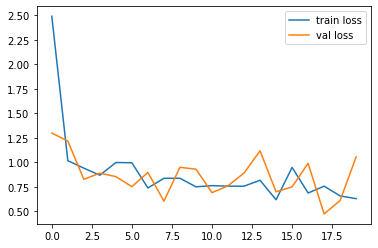

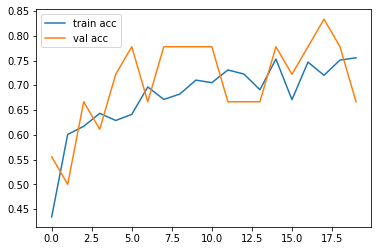

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [18]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[5.95174311e-03, 1.14801601e-01, 8.29868019e-01, 4.93786149e-02],
       [2.14164183e-02, 9.53607559e-01, 3.10258562e-04, 2.46658307e-02],
       [6.50016591e-04, 1.11232795e-01, 3.95764271e-03, 8.84159565e-01],
       [1.93252417e-05, 4.49766922e-05, 9.95873272e-01, 4.06242022e-03],
       [3.42330204e-05, 9.91489768e-01, 1.19527715e-06, 8.47483519e-03],
       [1.23109226e-03, 9.86869037e-01, 3.81521578e-03, 8.08458403e-03],
       [5.87478462e-05, 3.58854800e-01, 3.60897538e-04, 6.40725553e-01],
       [3.91045614e-04, 6.27861321e-01, 2.32649455e-03, 3.69421095e-01],
       [1.04191052e-02, 5.93190454e-02, 9.24985945e-01, 5.27583156e-03],
       [2.75779108e-04, 1.50653301e-04, 1.49336571e-04, 9.99424219e-01],
       [7.46275997e-04, 2.65692621e-02, 9.57699299e-01, 1.49851935e-02],
       [3.60149716e-05, 9.98823106e-01, 1.14319755e-06, 1.13969296e-03],
       [9.92956877e-01, 4.67999380e-05, 5.34584979e-04, 6.46174606e-03],
       [5.00661954e-05, 9.85582352e-01, 3.27752874e

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 1, 3, 2, 1, 1, 3, 1, 2, 3, 2, 1, 0, 1, 1, 2, 1, 1], dtype=int64)

In [59]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_resnet50.h5')

In [75]:
img_data

NameError: name 'img_data' is not defined

In [39]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/Test/Coffee/download (2).jpg'

In [74]:
x=image.img_to_array(img)
x

NameError: name 'img' is not defined

In [41]:
x.shape

TensorShape([None, 100352])

In [69]:
x=x/255

In [70]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

NotImplementedError: Cannot convert a symbolic Tensor (RealDiv_4:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model.predict(img_data)

In [72]:
a=np.argmax(model.predict(img_data), axis=1)

NameError: name 'img_data' is not defined

In [73]:
a==1

NameError: name 'a' is not defined